# Лабораторная работа № 4. Нейронные сети

Постройте нейросетевой классификатор для набора данных [MNIST](https://www.kaggle.com/c/digit-recognizer).

## Задание

1. Постройте двуслойную нейронную сеть.
2. Постройте отчет по классификации  [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) и матрицу ошибок [confusion_matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)
3. Добавьте скрытые слои и оцените как изменится качество классификации.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
import matplotlib.image as mpimg
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.callbacks import ReduceLROnPlateau
import gc
from keras.callbacks import ModelCheckpoint

In [4]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("physical_devices-------------", len(physical_devices))

physical_devices------------- 1


In [5]:
tf.config.experimental.set_memory_growth(physical_devices[0], False)

In [6]:
data_train = pd.read_csv("train.csv")
data_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train = pd.DataFrame(data_train.drop(['label'], axis = 1))
Y_train = pd.DataFrame(data_train['label'])
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y_train

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [9]:
X_train = X_train / 255
X_train = X_train.values.reshape(-1, 28, 28, 1)
Y_train = to_categorical(Y_train, num_classes = 10)
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

Values:  [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.      

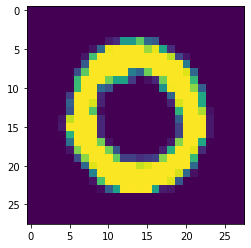

In [10]:
plt.imshow(X_train[1][:, :, 0])
print("Values: ", X_train[1][:, :, 0])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.25)

In [12]:
model = Sequential()

#Input layer
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())

#First layer
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Second layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

#OutputLayer
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))# Выбираем, какая цифра из десяти на картинке с наибольшей вероятностью
#model.save("Digit_rec_model.hdf5", include_optimizer = False)

In [15]:
weights_file = "weights.hdf5"
#checkpoint = ModelCheckpoint(weights_file, monitor='loss', mode='min', save_best_only=True, verbose=1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 5
batch_size = 32
datagen = ImageDataGenerator()
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size), 
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks = [learning_rate_reduction] )



Epoch 1/5
 - 49s - loss: 0.2578 - accuracy: 0.9485 - val_loss: 0.1273 - val_accuracy: 0.9716
Epoch 2/5


F:\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 46s - loss: 0.0852 - accuracy: 0.9819 - val_loss: 0.0949 - val_accuracy: 0.9789
Epoch 3/5
 - 46s - loss: 0.0605 - accuracy: 0.9873 - val_loss: 0.0896 - val_accuracy: 0.9845
Epoch 4/5
 - 46s - loss: 0.0400 - accuracy: 0.9910 - val_loss: 0.0827 - val_accuracy: 0.9851
Epoch 5/5
 - 46s - loss: 0.0332 - accuracy: 0.9923 - val_loss: 0.0838 - val_accuracy: 0.9852


In [16]:
gc.collect()

52

In [24]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis = 1) 
Y_test = np.argmax(Y_test, axis = 1) 
predicted

array([6, 7, 6, ..., 2, 8, 8], dtype=int64)

In [26]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1028
           1       0.99      0.99      0.99      1166
           2       1.00      0.98      0.99      1042
           3       0.98      0.99      0.99      1103
           4       0.99      0.98      0.99      1028
           5       0.98      0.98      0.98       920
           6       0.99      0.98      0.99      1014
           7       0.98      0.99      0.98      1144
           8       0.97      0.99      0.98      1035
           9       0.97      0.98      0.98      1020

    accuracy                           0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



In [35]:
print(confusion_matrix(Y_test, predicted, normalize = 'true'))

[[9.89299611e-01 0.00000000e+00 9.72762646e-04 9.72762646e-04
  0.00000000e+00 9.72762646e-04 1.94552529e-03 0.00000000e+00
  3.89105058e-03 1.94552529e-03]
 [0.00000000e+00 9.90566038e-01 0.00000000e+00 2.57289880e-03
  3.43053173e-03 0.00000000e+00 0.00000000e+00 1.71526587e-03
  8.57632933e-04 8.57632933e-04]
 [9.59692898e-04 1.91938580e-03 9.75047985e-01 5.75815739e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.05566219e-02
  3.83877159e-03 1.91938580e-03]
 [0.00000000e+00 0.00000000e+00 9.06618314e-04 9.89120580e-01
  0.00000000e+00 2.71985494e-03 0.00000000e+00 3.62647325e-03
  1.81323663e-03 1.81323663e-03]
 [0.00000000e+00 2.91828794e-03 0.00000000e+00 0.00000000e+00
  9.79571984e-01 0.00000000e+00 1.94552529e-03 0.00000000e+00
  5.83657588e-03 9.72762646e-03]
 [2.17391304e-03 1.08695652e-03 0.00000000e+00 5.43478261e-03
  1.08695652e-03 9.82608696e-01 2.17391304e-03 0.00000000e+00
  4.34782609e-03 1.08695652e-03]
 [1.97238659e-03 0.00000000e+00 0.00000000e+00 0.00000000e

# Загрузим модель и веса для нее и составим отчет

In [30]:
from keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
import matplotlib.image as mpimg
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.callbacks import ReduceLROnPlateau
import gc
from keras.callbacks import ModelCheckpoint

In [31]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("physical_devices-------------", len(physical_devices))

physical_devices------------- 1


In [32]:
tf.config.experimental.set_memory_growth(physical_devices[0], False)

In [33]:
data_train = pd.read_csv("train.csv")
X_train = pd.DataFrame(data_train.drop(['label'], axis = 1))
Y_train = pd.DataFrame(data_train['label'])
X_train = X_train / 255
X_train = X_train.values.reshape(-1, 28, 28, 1)
Y_train = to_categorical(Y_train, num_classes = 10)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.25)

In [34]:
past_model = load_model("Digit_rec_model.hdf5")
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
past_model.compile(optimizer = optimizer , loss = "categorical_crossentropy")

In [18]:
predicted = past_model.predict(X_test)

NameError: name 'past_model' is not defined

In [17]:
predicted = np.argmax(predicted,axis = 1) 
classification_report(Y_test, predicted)

NameError: name 'predicted' is not defined

In [26]:
confusion_matrix(past_model, X_train, predicted)

TypeError: Expected sequence or array-like, got <class 'keras.engine.sequential.Sequential'>